In [42]:
import numpy as np
import pandas as pd

import os
import matplotlib
import numpy as np
from scipy.stats import linregress 
from scipy import stats
import scipy.stats as sts



In [43]:
# Visualization
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [44]:
# Import data
fb1_df = pd.read_csv('../Data/Alicia/fb1_test_data.csv')
fb1_df.head()


,Unnamed: 0,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
0,0,CNN,Po Murray writes that the two mass killings in...,Opinion: What has to happen after the Colorado...,https://www.facebook.com/cnn/?__cft__[0]=AZVAV...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,102,98 Comments,6 Shares,1 Reply,'REAL'
1,1,CNN,Mississippi is one of three states that have e...,More states aim to offer Covid-19 vaccines to ...,https://www.facebook.com/cnn/?__cft__[0]=AZU2o...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,574,98 Comments,31 Shares,1 Reply,'FAKE'
2,2,CNN,"In 2018, the city of Boulder, Colorado, passed...",Boulder banned assault weapons in 2018. A judg...,https://www.facebook.com/cnn/?__cft__[0]=AZVNa...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1.1K,1.2K Comments,119 Shares,112 Replies,'FAKE'
3,3,CNN,"""The life of a single parent is challenging to...",Opinion: My Covid life as a single mom: Like j...,https://www.facebook.com/cnn/?__cft__[0]=AZWhO...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,554,202 Comments,37 Shares,9 Replies,'FAKE'
4,4,CNN,British people attempting to go on vacation wh...,"New UK law means $7,000 fines for vacations ab...",https://www.facebook.com/cnn/?__cft__[0]=AZXIu...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,912,390 Comments,83 Shares,View more comments,'FAKE'


In [45]:
# Import data from 
fb2_df = pd.read_csv('../Data/Alicia/fb2_test_data.csv')
fb2_df.head()


,Unnamed: 0,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
0,0,Conservative Post,"This program, and the $500 monthly checks it o...",Struggling White Families Not Allowed To Parte...,https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,180,11 Comments,29 Shares,View 40 more comments,'FAKE'
1,1,Conservative Post,Biden appeared to simply give up on what he wa...,The First TV: Biden Lapses Into Nonsense Durin...,https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,220,7 Comments,391 Shares,View previous comments,'FAKE'
2,2,Conservative Post,Right observation! Biden used notes extensivel...,Fox’s Baier: I Haven’t Seen Presidents Flip Th...,https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,128,43 Comments,2.6K Shares,View previous comments,'FAKE'
3,3,Conservative Post,She has been charged with felony obstruction o...,Georgia Dem Arrested After Defying Police and ...,https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,364,64 Comments,43 Shares,View previous comments,'FAKE'
4,4,Conservative Post,Let's go Georgia!,Georgia Governor Signs Into Law Sweeping Elect...,https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,845,58 Comments,1.1K Shares,View previous comments,'REAL'


In [46]:
all_news_df = pd.concat([fb1_df, fb2_df])
all_news_df.head()

,Unnamed: 0,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
0,0,CNN,Po Murray writes that the two mass killings in...,Opinion: What has to happen after the Colorado...,https://www.facebook.com/cnn/?__cft__[0]=AZVAV...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,102,98 Comments,6 Shares,1 Reply,'REAL'
1,1,CNN,Mississippi is one of three states that have e...,More states aim to offer Covid-19 vaccines to ...,https://www.facebook.com/cnn/?__cft__[0]=AZU2o...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,574,98 Comments,31 Shares,1 Reply,'FAKE'
2,2,CNN,"In 2018, the city of Boulder, Colorado, passed...",Boulder banned assault weapons in 2018. A judg...,https://www.facebook.com/cnn/?__cft__[0]=AZVNa...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1.1K,1.2K Comments,119 Shares,112 Replies,'FAKE'
3,3,CNN,"""The life of a single parent is challenging to...",Opinion: My Covid life as a single mom: Like j...,https://www.facebook.com/cnn/?__cft__[0]=AZWhO...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,554,202 Comments,37 Shares,9 Replies,'FAKE'
4,4,CNN,British people attempting to go on vacation wh...,"New UK law means $7,000 fines for vacations ab...",https://www.facebook.com/cnn/?__cft__[0]=AZXIu...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,912,390 Comments,83 Shares,View more comments,'FAKE'


In [47]:
# Drop first column
all_news_df = all_news_df.drop(all_news_df.columns[0], axis=1)
all_news_df

,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
0,CNN,Po Murray writes that the two mass killings in...,Opinion: What has to happen after the Colorado...,https://www.facebook.com/cnn/?__cft__[0]=AZVAV...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,102,98 Comments,6 Shares,1 Reply,'REAL'
1,CNN,Mississippi is one of three states that have e...,More states aim to offer Covid-19 vaccines to ...,https://www.facebook.com/cnn/?__cft__[0]=AZU2o...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,574,98 Comments,31 Shares,1 Reply,'FAKE'
2,CNN,"In 2018, the city of Boulder, Colorado, passed...",Boulder banned assault weapons in 2018. A judg...,https://www.facebook.com/cnn/?__cft__[0]=AZVNa...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1.1K,1.2K Comments,119 Shares,112 Replies,'FAKE'
3,CNN,"""The life of a single parent is challenging to...",Opinion: My Covid life as a single mom: Like j...,https://www.facebook.com/cnn/?__cft__[0]=AZWhO...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,554,202 Comments,37 Shares,9 Replies,'FAKE'
4,CNN,British people attempting to go on vacation wh...,"New UK law means $7,000 fines for vacations ab...",https://www.facebook.com/cnn/?__cft__[0]=AZXIu...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,912,390 Comments,83 Shares,View more comments,'FAKE'
...,...,...,...,...,...,...,...,...,...,...
934,BuzzFeed Politics,"Joe Biden's announcement, part of a national a...",White House: All US Adults Will Be Eligible Fo...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1.1K,588 Comments,314 Shares,View previous comments,'REAL'
935,BuzzFeed Politics,“We will move with a sense of urgency on clima...,Michael Regan Will Be The First Black Man To L...,https://www.facebook.com/BuzzFeedPol/,NaN,5.8K,12K Comments,461 Shares,View 9 more replies,'FAKE'
936,BuzzFeed Politics,Garland has said investigating the Capitol ins...,The Senate Confirmed Merrick Garland As The Ne...,https://www.facebook.com/BuzzFeedPol/,NaN,1.6K,2.9K Comments,275 Shares,7 Replies,'REAL'
937,BuzzFeed Politics,"Checks of $1,400, unemployment benefits, and h...",Congress Just Passed Another Round Of COVID Ch...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,890,619 Comments,91 Shares,View previous comments,'REAL'


In [48]:
# Split the values to show only numeric without the words like Shares, Comments, Replies
all_news_df["Facebook_likes"] = all_news_df["Facebook_likes"].str.split(" ", n = 1, expand = True)
all_news_df["Facebook_comments"] = all_news_df["Facebook_comments"].str.split(" ", n = 1, expand = True)
all_news_df["Facebook_shares"] = all_news_df["Facebook_shares"].str.split(" ", n = 1, expand = True)
all_news_df["Comment_replies"] = all_news_df["Comment_replies"].str.split(" ", n = 1, expand = True)

In [49]:
# To replace the "view" text from the column "Comment_replies" with zero 
all_news_df["Comment_replies"] = all_news_df["Comment_replies"].replace(to_replace ="View", value ="0")

In [50]:
# Convert the "K" to thousands in numerical 
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000
    return x


In [51]:
all_news_df["Facebook_comments"] = all_news_df["Facebook_comments"].apply(value_to_float)
all_news_df["Facebook_likes"] = all_news_df["Facebook_likes"].apply(value_to_float)
all_news_df["Facebook_shares"] = all_news_df["Facebook_shares"].apply(value_to_float)


In [52]:
all_news_df

,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
0,CNN,Po Murray writes that the two mass killings in...,Opinion: What has to happen after the Colorado...,https://www.facebook.com/cnn/?__cft__[0]=AZVAV...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,102,98,6,1,'REAL'
1,CNN,Mississippi is one of three states that have e...,More states aim to offer Covid-19 vaccines to ...,https://www.facebook.com/cnn/?__cft__[0]=AZU2o...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,574,98,31,1,'FAKE'
2,CNN,"In 2018, the city of Boulder, Colorado, passed...",Boulder banned assault weapons in 2018. A judg...,https://www.facebook.com/cnn/?__cft__[0]=AZVNa...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1100.0,1200.0,119,112,'FAKE'
3,CNN,"""The life of a single parent is challenging to...",Opinion: My Covid life as a single mom: Like j...,https://www.facebook.com/cnn/?__cft__[0]=AZWhO...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,554,202,37,9,'FAKE'
4,CNN,British people attempting to go on vacation wh...,"New UK law means $7,000 fines for vacations ab...",https://www.facebook.com/cnn/?__cft__[0]=AZXIu...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,912,390,83,0,'FAKE'
...,...,...,...,...,...,...,...,...,...,...
934,BuzzFeed Politics,"Joe Biden's announcement, part of a national a...",White House: All US Adults Will Be Eligible Fo...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1100.0,588,314,0,'REAL'
935,BuzzFeed Politics,“We will move with a sense of urgency on clima...,Michael Regan Will Be The First Black Man To L...,https://www.facebook.com/BuzzFeedPol/,NaN,5800.0,12000.0,461,0,'FAKE'
936,BuzzFeed Politics,Garland has said investigating the Capitol ins...,The Senate Confirmed Merrick Garland As The Ne...,https://www.facebook.com/BuzzFeedPol/,NaN,1600.0,2900.0,275,7,'REAL'
937,BuzzFeed Politics,"Checks of $1,400, unemployment benefits, and h...",Congress Just Passed Another Round Of COVID Ch...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,890,619,91,0,'REAL'


In [53]:
all_news_df.dtypes

Title                object
Article              object
Headline             object
Title_URL            object
Image                object
Facebook_likes       object
Facebook_comments    object
Facebook_shares      object
Comment_replies      object
results              object
dtype: object

In [54]:
# Convert to new csv file
final_cleaned_data = all_news_df.to_csv("final_cleaned_data.csv")
final_cleaned_data


# Import a cleaned CSV file for visualization


In [62]:
# Import data
all_cleaned_news = pd.read_csv('../Data/Alicia/final_categorized_data.csv')
all_cleaned_news


,Unnamed: 0,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
0,0,CNN,Po Murray writes that the two mass killings in...,Opinion: What has to happen after the Colorado...,https://www.facebook.com/cnn/?__cft__[0]=AZVAV...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,102.0,98.0,6.0,1,'REAL'
1,1,CNN,Mississippi is one of three states that have e...,More states aim to offer Covid-19 vaccines to ...,https://www.facebook.com/cnn/?__cft__[0]=AZU2o...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,574.0,98.0,31.0,1,'FAKE'
2,2,CNN,"In 2018, the city of Boulder, Colorado, passed...",Boulder banned assault weapons in 2018. A judg...,https://www.facebook.com/cnn/?__cft__[0]=AZVNa...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1100.0,1200.0,119.0,112,'FAKE'
3,3,CNN,"""The life of a single parent is challenging to...",Opinion: My Covid life as a single mom: Like j...,https://www.facebook.com/cnn/?__cft__[0]=AZWhO...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,554.0,202.0,37.0,9,'FAKE'
4,4,CNN,British people attempting to go on vacation wh...,"New UK law means $7,000 fines for vacations ab...",https://www.facebook.com/cnn/?__cft__[0]=AZXIu...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,912.0,390.0,83.0,0,'FAKE'
...,...,...,...,...,...,...,...,...,...,...,...
1977,934,BuzzFeed Politics,"Joe Biden's announcement, part of a national a...",White House: All US Adults Will Be Eligible Fo...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1100.0,588.0,314.0,0,'REAL'
1978,935,BuzzFeed Politics,“We will move with a sense of urgency on clima...,Michael Regan Will Be The First Black Man To L...,https://www.facebook.com/BuzzFeedPol/,NaN,5800.0,12000.0,461.0,0,'FAKE'
1979,936,BuzzFeed Politics,Garland has said investigating the Capitol ins...,The Senate Confirmed Merrick Garland As The Ne...,https://www.facebook.com/BuzzFeedPol/,NaN,1600.0,2900.0,275.0,7,'REAL'
1980,937,BuzzFeed Politics,"Checks of $1,400, unemployment benefits, and h...",Congress Just Passed Another Round Of COVID Ch...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,890.0,619.0,91.0,0,'REAL'


In [63]:
# Drop first column
all_cleaned_news = all_cleaned_news.drop(all_cleaned_news.columns[0], axis=1)
all_cleaned_news.head()

,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
0,CNN,Po Murray writes that the two mass killings in...,Opinion: What has to happen after the Colorado...,https://www.facebook.com/cnn/?__cft__[0]=AZVAV...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,102.0,98.0,6.0,1,'REAL'
1,CNN,Mississippi is one of three states that have e...,More states aim to offer Covid-19 vaccines to ...,https://www.facebook.com/cnn/?__cft__[0]=AZU2o...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,574.0,98.0,31.0,1,'FAKE'
2,CNN,"In 2018, the city of Boulder, Colorado, passed...",Boulder banned assault weapons in 2018. A judg...,https://www.facebook.com/cnn/?__cft__[0]=AZVNa...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1100.0,1200.0,119.0,112,'FAKE'
3,CNN,"""The life of a single parent is challenging to...",Opinion: My Covid life as a single mom: Like j...,https://www.facebook.com/cnn/?__cft__[0]=AZWhO...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,554.0,202.0,37.0,9,'FAKE'
4,CNN,British people attempting to go on vacation wh...,"New UK law means $7,000 fines for vacations ab...",https://www.facebook.com/cnn/?__cft__[0]=AZXIu...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,912.0,390.0,83.0,0,'FAKE'


In [64]:
# Checking how many real/fake news from the 1982 row of data
check_count = all_cleaned_news["results"].value_counts()
check_count


'FAKE'    1477
'REAL'     505
Name: results, dtype: int64

In [65]:
# Make a new dataframe for plotting
check_count = pd.DataFrame(check_count)
check_count

,results
'FAKE',1477
'REAL',505


In [66]:
# Summary of How many Fake & Real News that was tested from the Scraped data
fake_real_count = check_count.hvplot.bar(hover_color="pink", width=800, ylim=(0,1600), title="Summary of Real & Fake News", xlabel="Authenticity", ylabel="Number of News Article").opts(
    yformatter='%0f'
)

fake_real_count

:Bars   [index]   (results)

In [67]:
# Saving the plot
# check_count.hvplot.bar.save('fake_real_count.html')

In [72]:
# This needs further cleaning
all_news_title = all_cleaned_news['Title'].value_counts()
all_news_title

Daily Mail           373
Conservative Post    353
CNN                  350
Fox News             320
BuzzFeed Politics    312
BBC                  274
Name: Title, dtype: int64

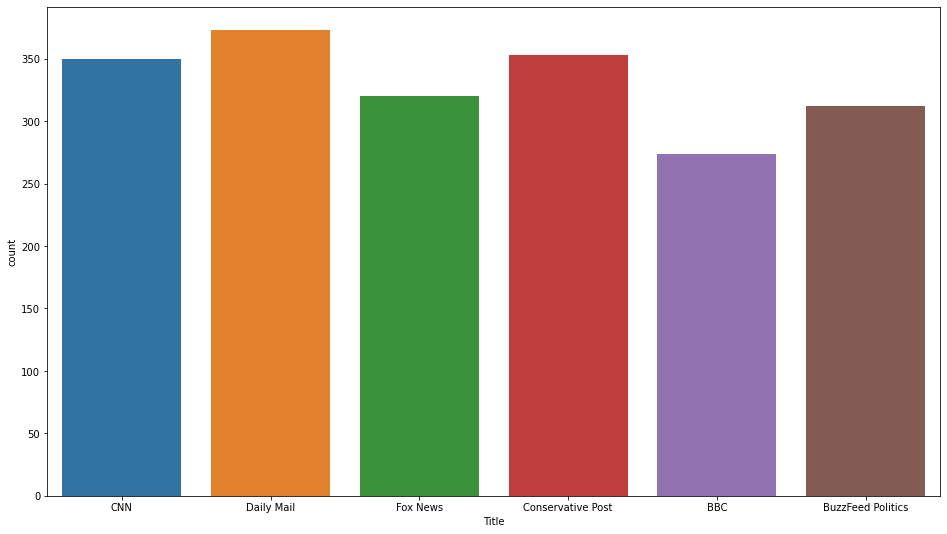

In [75]:
plt.figure(figsize=(16,9))
sns.countplot(x="Title", data=all_cleaned_news)


In [74]:
# How many fake news based on varies News title/channel
# whats the max amount of share/like/comment post for fake news
# whats the max amount of share/like/comment post for real news
